### DUD-E Property Distributions    

A simple example comparing the property distributions for DUD-E actives and decoys

In [1]:
import pandas as pd
import useful_rdkit_utils as uru
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DUDE_DIRECTORY = "/Users/pwalters/DATA/DUD-E"

In [3]:
def read_data(dirname):
    active_df = pd.read_csv(f"{dirname}/actives_final.ism",sep=" ",names=["SMILES","Cmpd_ID","ChEMBL_ID"])
    active_df['active'] = 1
    decoy_df = pd.read_csv(f"{dirname}/decoys_final.ism",sep=" ",names=["SMILES","Cmpd_ID","ChEMBL_ID"])
    decoy_df['active'] = 0
    combo_df = pd.concat([active_df, decoy_df]).reset_index()
    return combo_df
    return combo_df

Read the data

In [4]:
df = read_data(f"{DUDE_DIRECTORY}/all/akt1")

Instantiate an Ro5Calculator from useful_rdkit_utils

In [5]:
ro5 = uru.Ro5Calculator()
prop_df = ro5.pandas_smiles(df.SMILES)

  0%|          | 0/16743 [00:00<?, ?it/s]

Combine tha data and Ro5 descriptors into one dataframe

In [6]:
df = pd.concat([df,prop_df],axis=1)

Plot the property distributions

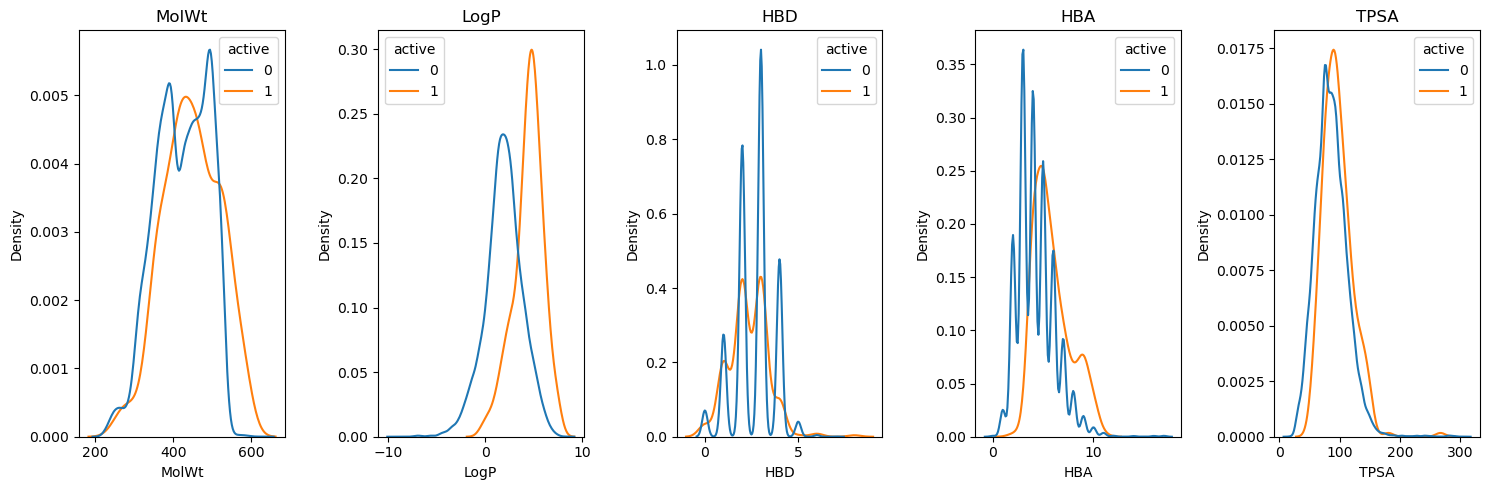

In [7]:
figure, axes = plt.subplots(1,5,figsize=(15,5))
for idx,col in enumerate(df.columns[5:]):
    ax = sns.kdeplot(x=col,hue="active",data=df,ax=axes[idx],common_norm=False)
    ax.set_title(col)
plt.tight_layout()